# Compression Heat Map

In [1]:
import pandas as pd

In [39]:
lossy_df = pd.read_csv('output/cavs_mini_lossy_v2_Test.csv') #Id be skeptical about these results and also I am not using lossy anyway

# Lossy

In [2]:
compressors_dict = {}

In [3]:
import math
data = lossy_df[['compressor', 'CR', 'psnr', 'ssim', 'total_time', 'compressed_size_bytes', 'uncompressed_size_bytes', 'bound']]

compressors = ['SZ3', 'ZFP', 'JPEG', 'Uncompressed']
error_bounds = ['1E-7', '1E-6', '1E-5', '1E-4', '1E-3', '1E-2', '1E-1']
bounds = [math.exp(-7),math.exp(-6),math.exp(-5),math.exp(-4),math.exp(-3),math.exp(-2),math.exp(-1)]

quality_levels = ['Q0', 'Q10', 'Q20', 'Q30', 'Q40', 'Q50', 'Q60', 'Q70', 'Q80', 'Q90', 'Q100']

def isclose(x, ref_value):
    return math.isclose(x, ref_value)

for comp in compressors:
    if comp != 'Uncompressed' and comp != "JPEG":
        comp_df = data[data['compressor'] == comp.lower()] #pick the compressor
        compressors_dict[comp] = {}

        for idx, bound in enumerate(bounds):
            
            compressors_dict[comp][error_bounds[idx]] = {}
            comp_error_df = comp_df[comp_df['bound'].apply(isclose, args=[bound]) ]
            
            mean_cr = (comp_error_df['uncompressed_size_bytes']/comp_error_df['compressed_size_bytes']).mean()
            mean_psnr = (comp_error_df['psnr']).mean()
            mean_ssim = (comp_error_df['ssim']).mean()
            total_time = comp_error_df['total_time'].sum()
            compressed_size_bytes = comp_error_df['compressed_size_bytes'].sum()
            uncompressed_size_bytes = comp_error_df['uncompressed_size_bytes'].sum() #sum to treat it like total size for dataset

            compressors_dict[comp][error_bounds[idx]]["cr"] = mean_cr
            compressors_dict[comp][error_bounds[idx]]["psnr"] = mean_psnr
            compressors_dict[comp][error_bounds[idx]]["ssim"] = mean_ssim
            compressors_dict[comp][error_bounds[idx]]["total_time"] = total_time
            compressors_dict[comp][error_bounds[idx]]["compressed_size_bytes"] = compressed_size_bytes 
            compressors_dict[comp][error_bounds[idx]]["uncompressed_size_bytes"] = uncompressed_size_bytes

            print(f"num images is: {comp_error_df.shape}")
            print(f"Error Bound: {error_bounds[idx]}")
            print(f"The mean CR for rows with compressor '{comp}' is: {mean_cr}")
            print(f"The mean psnr for rows with compressor '{comp}' is: {mean_psnr}")
            print(f"The mean ssim for rows with compressor '{comp}' is: {mean_ssim}")
            print(f"The time taken for rows with compressor '{comp}' is: {total_time} seconds")
            print(f"The size it compressed it to with compressor '{comp}' is: {compressed_size_bytes} bytes")
            print(f"Uncompressed size is is: {uncompressed_size_bytes} bytes")

NameError: name 'lossy_df' is not defined

In [42]:
#in MiB per second
bandwidths = [1000, 100, 50, 10, 5,] #lets say this is in Mb per second

compressors = ['SZ3', 'ZFP', 'JPEG', 'Uncompressed']

compressor_labels = []

error_bounds = ['1E-7', '1E-6', '1E-5', '1E-4', '1E-3', '1E-2', '1E-1']

for comp in compressors:
    if comp != 'Uncompressed':
        for error_bound in error_bounds:
            label = '{} CR:{:0.2f}'.format(comp, compressors_dict[comp][error_bound]["cr"])
    else:
        label = "Uncompressed"
    compressor_labels.append(label)
    
compressor_labels

KeyError: 'JPEG'

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
#compression_ratios = np.linspace(1, 10, 20)  # From 1:1 to 10:1
#compressors = ['zstd','blosclz','lz4','lz4hc','zlib'] #all are lossless except for zfp and sz3 which are lossy (for now lets only include lossless)

# Create a 2D array for the heat map values
# This example uses random data - replace with your actual measurements
#These are the times it takes for that configuration to theoretically send
data = np.random.rand(len(bandwidths), len(compressor_labels))

#time_to_compress + compressed_dataset_size / (transfer bandwidth) + time_to_decompress

#compressed_ds_size = ogsize / cr
#comp_time_avg + (compress_ds_size / bandwidths[i]) + decomp_time_avg OR (compress_ds_size / bandwidths[i]) + total_time_to_compress_and_decompress

#although I got a mismatch in uncompressed_ds_size for libpressio and for doing os.path.getsize, for consistency libpressio's numbers will be used

#converted to megabytes
uncompressed_ds_size = compressors_dict[compressors[0]]['1E-1']["uncompressed_size_bytes"] / 1000000

print(uncompressed_ds_size)

for idx_i, comp in enumerate(compressors):
    #compressed_ds_size = original_ds_size / compressors_dict[comp]["cr"] #og_ds_size / cr
    if comp != 'Uncompressed':
        #divide by 1000000 to convert it from bytes to megabytes (mb is 1e6 bytes)
        compressed_ds_size = compressors_dict[comp]['1E-1']["compressed_size_bytes"] / 1000000
    
    for idx_j, bw in enumerate(bandwidths):
        if comp != 'Uncompressed':
            #for compressors
            data[idx_j][idx_i] = (compressed_ds_size / bw) + compressors_dict[comp]['1E-1']["total_time"]
        else:
            #for without a compressor
            data[idx_j][idx_i] = (uncompressed_ds_size / bw)

3256.78464


In [39]:
# Set the global font to Times New Roman
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Nimbus Roman']

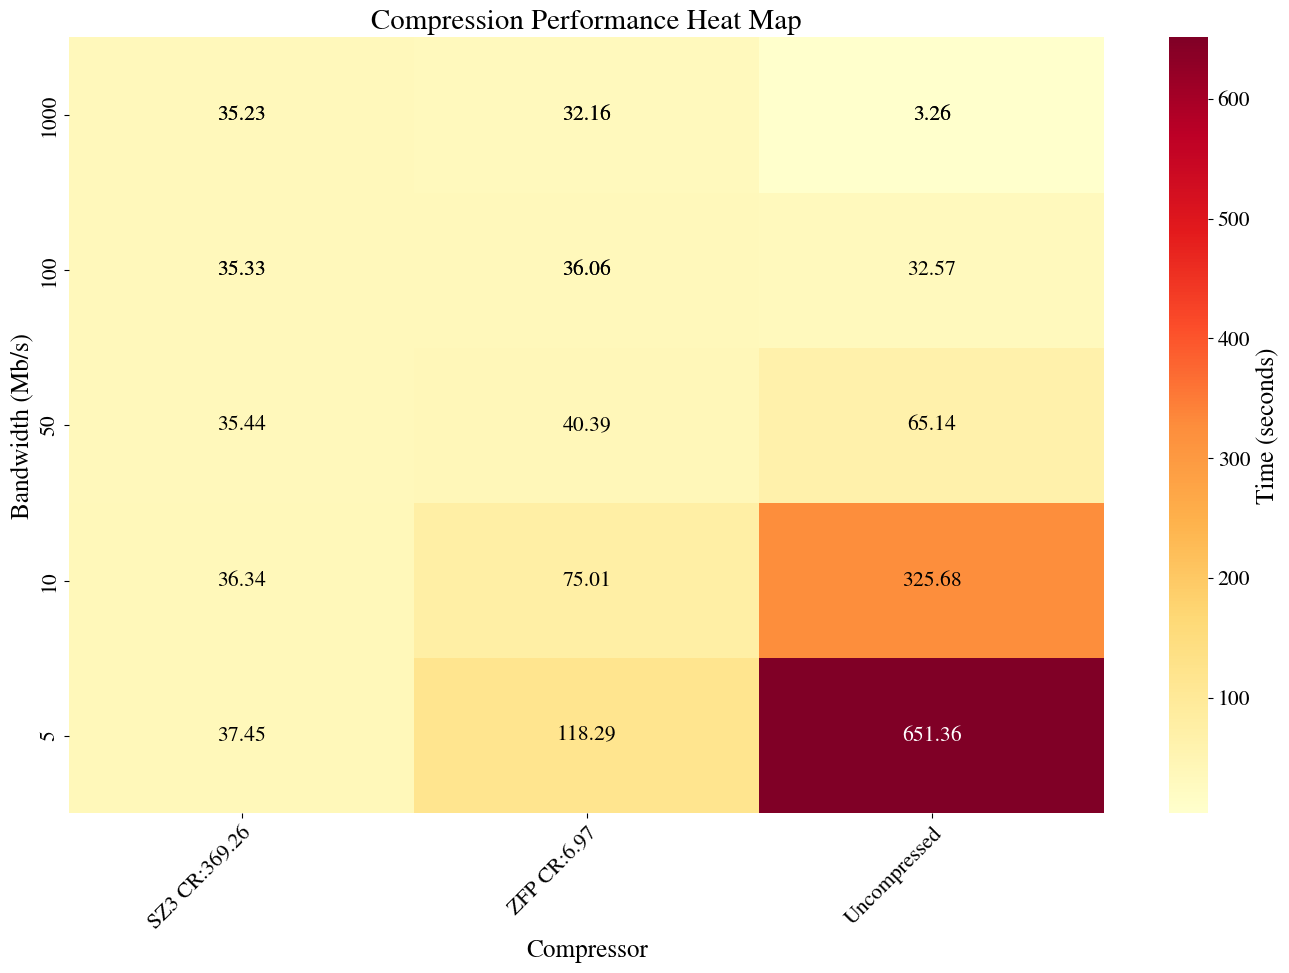

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Increase the font sizes
SMALL_SIZE = 12*1.3
MEDIUM_SIZE = 14*1.3
BIGGER_SIZE = 16*1.3

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Create the heat map
fig, ax = plt.subplots(figsize=(14, 10))  # Increased figure size
sns.heatmap(data, xticklabels=compressor_labels, yticklabels=bandwidths,
            cmap='YlOrRd', fmt='.2f', annot=True, ax=ax, cbar=True, 
            cbar_kws={'label': 'Time (seconds)'}, annot_kws={"size": SMALL_SIZE})

# Function to determine text color based on background
def text_color_for_background(value):
    threshold = (data.max() - data.min()) / 2.0 + data.min()
    return 'white' if value > threshold else 'black'

# Manually add text with conditional coloring
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        value = data[i, j]
        text_color = text_color_for_background(value)
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}',
                ha="center", va="center", color=text_color, fontsize=SMALL_SIZE)

plt.xlabel('Compressor', fontsize=MEDIUM_SIZE)
plt.ylabel('Bandwidth (Mb/s)', fontsize=MEDIUM_SIZE)
plt.title('Compression Performance Heat Map', fontsize=BIGGER_SIZE)

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Adjust layout
plt.tight_layout()

# Save the figure as PNG
plt.savefig('lossy_heatmap_final_v2.png', dpi=500, bbox_inches='tight')

# If you still want to display the plot, keep this line
plt.show()

# Lossless

In [4]:
import pandas as pd
lossless_df = pd.read_csv('output/cavs_mini_lossless_binary_Train.csv')

In [5]:
compressors_dict = {}

In [6]:
data = lossless_df[['compressor', 'CR', 'total_time', 'compressed_size_bytes', 'uncompressed_size_bytes']]

compressors = ['ZSTD','BLOSCLZ','LZ4','LZ4HC','ZLIB','Uncompressed']

for comp in compressors:
    if comp != 'Uncompressed':
        comp_df = data[data['compressor'] == comp.lower()]
        cr = comp_df['CR'].squeeze()
        total_time = comp_df['total_time'].squeeze()
        compressed_size_bytes = comp_df['compressed_size_bytes'].squeeze()
        uncompressed_size_bytes = comp_df['uncompressed_size_bytes'].squeeze()

        #.squeeze() makes it so it returns only the value of that cell and not also the label for that cell

        compressors_dict[comp] = {}
        compressors_dict[comp]["cr"] = cr
        compressors_dict[comp]["total_time"] = total_time
        compressors_dict[comp]["compressed_size_bytes"] = compressed_size_bytes
        compressors_dict[comp]["uncompressed_size_bytes"] = uncompressed_size_bytes

        print(f"num images is: {comp_df.shape}")
        print(f"The CR for rows with compressor '{comp}' is: {cr}")
        print(f"The time taken for rows with compressor '{comp}' is: {total_time} seconds")
        print(f"The size it compressed it to with compressor '{comp}' is: {compressed_size_bytes} bytes")
        print(f"Uncompressed size is is: {uncompressed_size_bytes} bytes")
        print("\n")
    else:
        pass

num images is: (1, 5)
The CR for rows with compressor 'ZSTD' is: 19.24803772827303
The time taken for rows with compressor 'ZSTD' is: 46.67621081753781 seconds
The size it compressed it to with compressor 'ZSTD' is: 98632874 bytes
Uncompressed size is is: 1898489280 bytes


num images is: (1, 5)
The CR for rows with compressor 'BLOSCLZ' is: 4.89913176521145
The time taken for rows with compressor 'BLOSCLZ' is: 1.7538767362895764 seconds
The size it compressed it to with compressor 'BLOSCLZ' is: 387515456 bytes
Uncompressed size is is: 1898489280 bytes


num images is: (1, 5)
The CR for rows with compressor 'LZ4' is: 5.126104115329284
The time taken for rows with compressor 'LZ4' is: 1.942763930872867 seconds
The size it compressed it to with compressor 'LZ4' is: 370357144 bytes
Uncompressed size is is: 1898489280 bytes


num images is: (1, 5)
The CR for rows with compressor 'LZ4HC' is: 10.687574536542408
The time taken for rows with compressor 'LZ4HC' is: 45.6747724131534 seconds
The s

In [7]:
#in MiB per second
bandwidths = [1000, 100, 50, 10, 5,] #lets say this is in Mb per second

compressors = ['ZSTD','BLOSCLZ','LZ4','LZ4HC','ZLIB', 'Uncompressed']

compressor_labels = []

for comp in compressors:
    if comp != 'Uncompressed':
        label = '{} CR:{:0.2f}'.format(comp, compressors_dict[comp]["cr"])
    else:
        label = "Uncompressed"
    compressor_labels.append(label)
    
compressor_labels

['ZSTD CR:19.25',
 'BLOSCLZ CR:4.90',
 'LZ4 CR:5.13',
 'LZ4HC CR:10.69',
 'ZLIB CR:17.07',
 'Uncompressed']

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
#compression_ratios = np.linspace(1, 10, 20)  # From 1:1 to 10:1
#compressors = ['zstd','blosclz','lz4','lz4hc','zlib'] #all are lossless except for zfp and sz3 which are lossy (for now lets only include lossless)

# Create a 2D array for the heat map values
# This example uses random data - replace with your actual measurements
#These are the times it takes for that configuration to theoretically send
data = np.random.rand(len(bandwidths), len(compressor_labels))

#time_to_compress + compressed_dataset_size / (transfer bandwidth) + time_to_decompress

#compressed_ds_size = ogsize / cr
#comp_time_avg + (compress_ds_size / bandwidths[i]) + decomp_time_avg OR (compress_ds_size / bandwidths[i]) + total_time_to_compress_and_decompress

#although I got a mismatch in uncompressed_ds_size for libpressio and for doing os.path.getsize, for consistency libpressio's numbers will be used

#converted to megabytes
uncompressed_ds_size = compressors_dict[compressors[0]]["uncompressed_size_bytes"] / 1000000

print(uncompressed_ds_size)

for idx_i, comp in enumerate(compressors):
    #compressed_ds_size = original_ds_size / compressors_dict[comp]["cr"] #og_ds_size / cr
    if comp != 'Uncompressed':
        #divide by 1000000 to convert it from bytes to megabytes (mb is 1e6 bytes)
        compressed_ds_size = compressors_dict[comp]["compressed_size_bytes"] / 1000000
    
    for idx_j, bw in enumerate(bandwidths):
        if comp != 'Uncompressed':
            #for compressors
            data[idx_j][idx_i] = (compressed_ds_size / bw) + compressors_dict[comp]["total_time"]
        else:
            #for without a compressor
            data[idx_j][idx_i] = (uncompressed_ds_size / bw)

1898.48928


In [9]:
# Set the global font to Times New Roman
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Nimbus Roman']

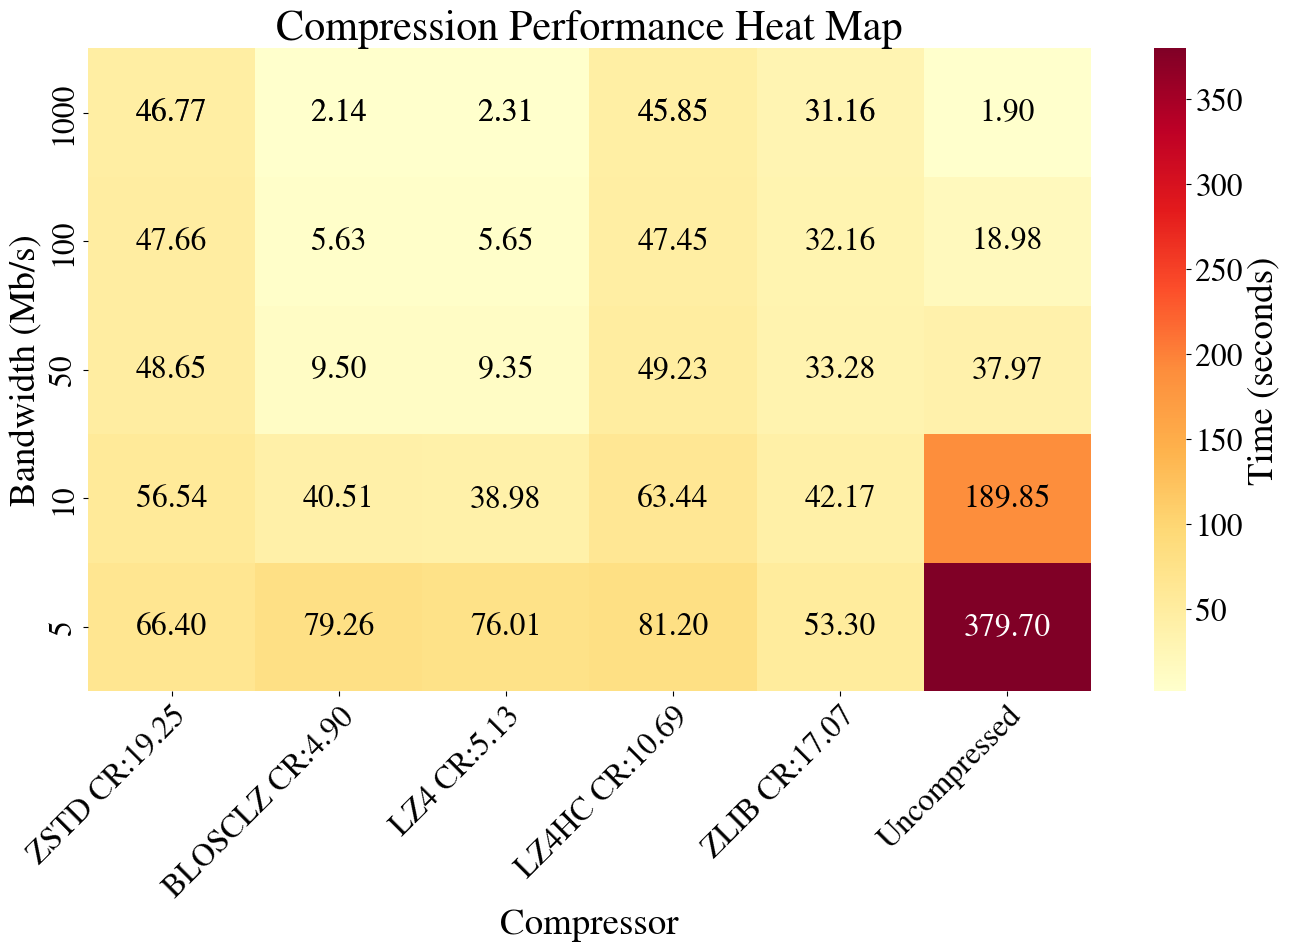

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Increase the font sizes
SMALL_SIZE = 12*1.9
MEDIUM_SIZE = 14*1.9
BIGGER_SIZE = 16*1.9

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Create the heat map
fig, ax = plt.subplots(figsize=(14, 10))  # Increased figure size
sns.heatmap(data, xticklabels=compressor_labels, yticklabels=bandwidths,
            cmap='YlOrRd', fmt='.2f', annot=True, ax=ax, cbar=True, 
            cbar_kws={'label': 'Time (seconds)'}, annot_kws={"size": SMALL_SIZE})

# Function to determine text color based on background
def text_color_for_background(value):
    threshold = (data.max() - data.min()) / 2.0 + data.min()
    return 'white' if value > threshold else 'black'

# Manually add text with conditional coloring
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        value = data[i, j]
        text_color = text_color_for_background(value)
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}',
                ha="center", va="center", color=text_color, fontsize=SMALL_SIZE)

plt.xlabel('Compressor', fontsize=MEDIUM_SIZE)
plt.ylabel('Bandwidth (Mb/s)', fontsize=MEDIUM_SIZE)
plt.title('Compression Performance Heat Map', fontsize=BIGGER_SIZE)

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Adjust layout
plt.tight_layout()

# Save the figure as PNG
plt.savefig('lossless_heatmap_final_v2.jpg', dpi=500, bbox_inches='tight')

# If you still want to display the plot, keep this line
plt.show()

# This mess

/local_scratch/slurm.725080/ipykernel_671587/1651372942.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpeg_data['quality'] = jpeg_data['quality'].astype(str)


num images is: (1268, 8)
Error Bound: 1E-7
The mean CR for rows with compressor 'SZ3' is: 1.1213294467667876
The mean psnr for rows with compressor 'SZ3' is: inf
The mean ssim for rows with compressor 'SZ3' is: 0.9909692542761631
The time taken for rows with compressor 'SZ3' is: 129.97376871109003 seconds
The size it compressed it to with compressor 'SZ3' is: 1638717433 bytes
Uncompressed size is is: 1898489280 bytes
num images is: (1268, 8)
Error Bound: 1E-6
The mean CR for rows with compressor 'SZ3' is: 1.41427464060882
The mean psnr for rows with compressor 'SZ3' is: 48.176852678848476
The mean ssim for rows with compressor 'SZ3' is: 0.9905589107109051
The time taken for rows with compressor 'SZ3' is: 123.86821293830866 seconds
The size it compressed it to with compressor 'SZ3' is: 1287634662 bytes
Uncompressed size is is: 1898489280 bytes
num images is: (1268, 8)
Error Bound: 1E-5
The mean CR for rows with compressor 'SZ3' is: 1.9341380659393903
The mean psnr for rows with compress

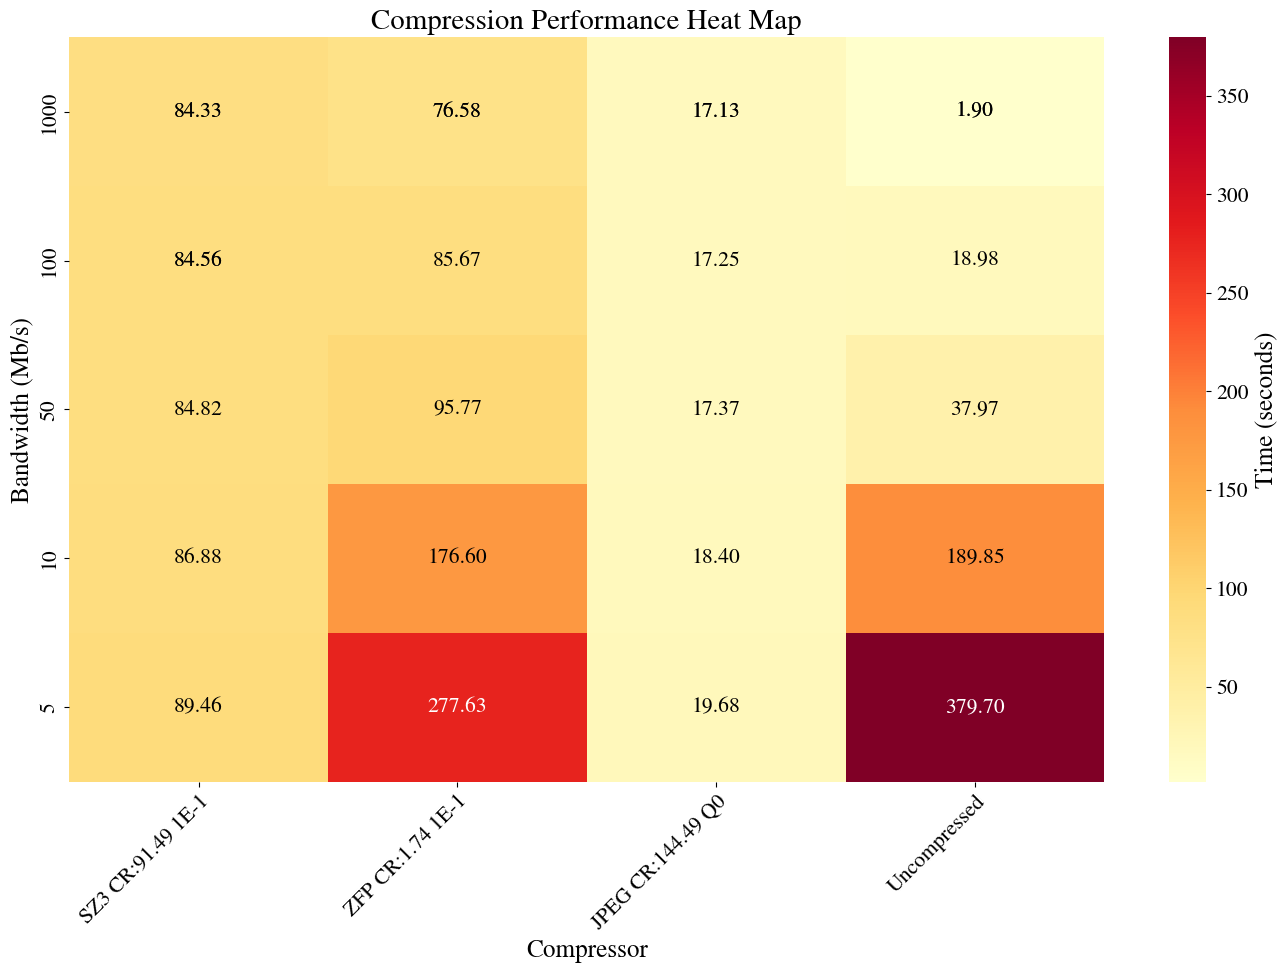

In [23]:
import pandas as pd

lossy_df = pd.read_csv('output/cavs_mini_lossy_v2_Train_v3.csv') #Id be skeptical about these results and also I am not using lossy anyway
jpeg_df = pd.read_csv('output/compression_metrics.csv')

compressors_dict = {}

import math
data = lossy_df[['compressor', 'CR', 'psnr', 'ssim', 'total_time', 'compressed_size_float32_bytes', 'uncompressed_size_bytes', 'bound']]
jpeg_data = jpeg_df[['psnr', 'ssim', 'total_time', 'compressed_size_bytes', 'uncompressed_size_bytes', 'quality', 'split']]
jpeg_data['quality'] = jpeg_data['quality'].astype(str)

compressors = ['SZ3', 'ZFP', 'JPEG', 'Uncompressed']
error_bounds = ['1E-7', '1E-6', '1E-5', '1E-4', '1E-3', '1E-2', '1E-1']
bounds = [math.exp(-7),math.exp(-6),math.exp(-5),math.exp(-4),math.exp(-3),math.exp(-2),math.exp(-1)]

quality_levels = ['100', '90', '80', '70', '60', '50', '40', '30', '20', '10', '0']

def isclose(x, ref_value):
    return math.isclose(x, ref_value)

for comp in compressors:
    if comp != 'Uncompressed' and comp != "JPEG":
        comp_df = data[data['compressor'] == comp.lower()] #pick the compressor
        compressors_dict[comp] = {}

        for idx, bound in enumerate(bounds):
            
            compressors_dict[comp][error_bounds[idx]] = {}
            comp_error_df = comp_df[comp_df['bound'].apply(isclose, args=[bound]) ]
            
            mean_cr = (comp_error_df['uncompressed_size_bytes']/comp_error_df['compressed_size_float32_bytes']).mean()
            mean_psnr = (comp_error_df['psnr']).mean()
            mean_ssim = (comp_error_df['ssim']).mean()
            total_time = comp_error_df['total_time'].sum()
            compressed_size_bytes = comp_error_df['compressed_size_float32_bytes'].sum()
            uncompressed_size_bytes = comp_error_df['uncompressed_size_bytes'].sum() #sum to treat it like total size for dataset

            compressors_dict[comp][error_bounds[idx]]["cr"] = mean_cr
            compressors_dict[comp][error_bounds[idx]]["psnr"] = mean_psnr
            compressors_dict[comp][error_bounds[idx]]["ssim"] = mean_ssim
            compressors_dict[comp][error_bounds[idx]]["total_time"] = total_time
            compressors_dict[comp][error_bounds[idx]]["compressed_size_bytes"] = compressed_size_bytes 
            compressors_dict[comp][error_bounds[idx]]["uncompressed_size_bytes"] = uncompressed_size_bytes

            print(f"num images is: {comp_error_df.shape}")
            print(f"Error Bound: {error_bounds[idx]}")
            print(f"The mean CR for rows with compressor '{comp}' is: {mean_cr}")
            print(f"The mean psnr for rows with compressor '{comp}' is: {mean_psnr}")
            print(f"The mean ssim for rows with compressor '{comp}' is: {mean_ssim}")
            print(f"The time taken for rows with compressor '{comp}' is: {total_time} seconds")
            print(f"The size it compressed it to with compressor '{comp}' is: {compressed_size_bytes} bytes")
            print(f"Uncompressed size is is: {uncompressed_size_bytes} bytes")
    elif comp == "JPEG":
        jpeg_comp_df = jpeg_data[jpeg_data["split"] == "Train"]
        compressors_dict[comp] = {}
        
        for idx, quality in enumerate(quality_levels):
            compressors_dict[comp][quality] = {}
            jpeg_quality_df = jpeg_comp_df[jpeg_comp_df['quality'] == quality]
            
            mean_cr = (jpeg_quality_df['uncompressed_size_bytes']/jpeg_quality_df['compressed_size_bytes']).mean()
            mean_psnr = (jpeg_quality_df['psnr']).mean()
            mean_ssim = (jpeg_quality_df['ssim']).mean()
            total_time = jpeg_quality_df['total_time'].sum()
            compressed_size_bytes = jpeg_quality_df['compressed_size_bytes'].sum()
            uncompressed_size_bytes = jpeg_quality_df['uncompressed_size_bytes'].sum() #sum to treat it like total size for dataset
            compressors_dict[comp][quality]["cr"] = mean_cr
            compressors_dict[comp][quality]["psnr"] = mean_psnr
            compressors_dict[comp][quality]["ssim"] = mean_ssim
            compressors_dict[comp][quality]["total_time"] = total_time
            compressors_dict[comp][quality]["compressed_size_bytes"] = compressed_size_bytes 
            compressors_dict[comp][quality]["uncompressed_size_bytes"] = uncompressed_size_bytes

            print(f"num images is: {jpeg_quality_df.shape}")
            print(f"Quality level: {quality}")
            print(f"The mean CR for rows with compressor '{comp}' is: {mean_cr}")
            print(f"The mean psnr for rows with compressor '{comp}' is: {mean_psnr}")
            print(f"The mean ssim for rows with compressor '{comp}' is: {mean_ssim}")
            print(f"The time taken for rows with compressor '{comp}' is: {total_time} seconds")
            print(f"The size it compressed it to with compressor '{comp}' is: {compressed_size_bytes} bytes")
            print(f"Uncompressed size is is: {uncompressed_size_bytes} bytes")


#in MiB per second
bandwidths = [1000, 100, 50, 10, 5,] #lets say this is in Mb per second

compressors = ['SZ3', 'ZFP', 'JPEG', 'Uncompressed']

compressor_labels = []

error_bounds = ['1E-7', '1E-6', '1E-5', '1E-4', '1E-3', '1E-2', '1E-1']
quality_levels = ['100', '90', '80', '70', '60', '50', '40', '30', '20', '10', '0']

lossy_compressor_bound = '1E-1'
jpeg_quality_level = '0'

for comp in compressors:
    if comp != 'Uncompressed' and comp != "JPEG":
        for error_bound in error_bounds:
            label = '{} CR:{:0.2f} {}'.format(comp, compressors_dict[comp][error_bound]["cr"], lossy_compressor_bound)
    elif comp == "JPEG":
        for quality in quality_levels:
            label = '{} CR:{:0.2f} Q{}'.format(comp, compressors_dict[comp][quality]["cr"], jpeg_quality_level)
    else:
        label = "Uncompressed"
    compressor_labels.append(label)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
#compression_ratios = np.linspace(1, 10, 20)  # From 1:1 to 10:1
#compressors = ['zstd','blosclz','lz4','lz4hc','zlib'] #all are lossless except for zfp and sz3 which are lossy (for now lets only include lossless)

# Create a 2D array for the heat map values
# This example uses random data - replace with your actual measurements
#These are the times it takes for that configuration to theoretically send
data = np.random.rand(len(bandwidths), len(compressor_labels))

#time_to_compress + compressed_dataset_size / (transfer bandwidth) + time_to_decompress

#compressed_ds_size = ogsize / cr
#comp_time_avg + (compress_ds_size / bandwidths[i]) + decomp_time_avg OR (compress_ds_size / bandwidths[i]) + total_time_to_compress_and_decompress

#although I got a mismatch in uncompressed_ds_size for libpressio and for doing os.path.getsize, for consistency libpressio's numbers will be used

#converted to megabytes
uncompressed_ds_size = compressors_dict[compressors[0]][lossy_compressor_bound]["uncompressed_size_bytes"] / 1000000

print(uncompressed_ds_size)

for idx_i, comp in enumerate(compressors):
    #compressed_ds_size = original_ds_size / compressors_dict[comp]["cr"] #og_ds_size / cr
    if comp != 'Uncompressed' and comp != "JPEG":
        #divide by 1000000 to convert it from bytes to megabytes (mb is 1e6 bytes)
        compressed_ds_size = compressors_dict[comp][lossy_compressor_bound]["compressed_size_bytes"] / 1000000
    elif comp == "JPEG":
        compressed_ds_size = compressors_dict[comp][jpeg_quality_level]["compressed_size_bytes"] / 1000000
    
    for idx_j, bw in enumerate(bandwidths):
        if comp == "JPEG":
            #for compressors
            data[idx_j][idx_i] = (compressed_ds_size / bw) + compressors_dict[comp][jpeg_quality_level]["total_time"]
        elif comp != 'Uncompressed' and comp != "JPEG":
            #for compressors
            data[idx_j][idx_i] = (compressed_ds_size / bw) + compressors_dict[comp][lossy_compressor_bound]["total_time"]
        else:
            #for without a compressor
            data[idx_j][idx_i] = (uncompressed_ds_size / bw)

# Set the global font to Times New Roman
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Nimbus Roman']

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Increase the font sizes
SMALL_SIZE = 12*1.3
MEDIUM_SIZE = 14*1.3
BIGGER_SIZE = 16*1.3

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Create the heat map
fig, ax = plt.subplots(figsize=(14, 10))  # Increased figure size
sns.heatmap(data, xticklabels=compressor_labels, yticklabels=bandwidths,
            cmap='YlOrRd', fmt='.2f', annot=True, ax=ax, cbar=True, 
            cbar_kws={'label': 'Time (seconds)'}, annot_kws={"size": SMALL_SIZE})

# Function to determine text color based on background
def text_color_for_background(value):
    threshold = (data.max() - data.min()) / 2.0 + data.min()
    return 'white' if value > threshold else 'black'

# Manually add text with conditional coloring
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        value = data[i, j]
        text_color = text_color_for_background(value)
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}',
                ha="center", va="center", color=text_color, fontsize=SMALL_SIZE)

plt.xlabel('Compressor', fontsize=MEDIUM_SIZE)
plt.ylabel('Bandwidth (Mb/s)', fontsize=MEDIUM_SIZE)
plt.title('Compression Performance Heat Map', fontsize=BIGGER_SIZE)

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Adjust layout
plt.tight_layout()

# Save the figure as PNG
plt.savefig('lossy_heatmap_final_v2.png', dpi=500, bbox_inches='tight')

# If you still want to display the plot, keep this line
plt.show()


In [24]:
jpeg = compressors_dict['JPEG']['0']


In [25]:
sz3 = compressors_dict['SZ3']['1E-1']

In [26]:
#(compressed_ds_size / bw) + compressors_dict[comp]['1E-1']["total_time"]
bw = 5
((sz3["compressed_size_bytes"]/ 1000000) / bw) + sz3["total_time"]

89.4627227083465

In [27]:
jpeg_df = pd.read_csv('compression_metrics.csv')
jpeg_data = jpeg_df[['psnr', 'ssim', 'total_time', 'compressed_size_bytes', 'uncompressed_size_bytes', 'quality', 'split']]
jpeg_data['quality'] = jpeg_data['quality'].astype(str)
df = jpeg_data[jpeg_data['quality'] == '100']
df
#jpeg_data

FileNotFoundError: [Errno 2] No such file or directory: 'compression_metrics.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
compressors_dict = {}

In [28]:
data = lossy_df[['compressor', 'CR', 'psnr', 'ssim', 'total_time', 'compressed_size_float32_bytes', 'uncompressed_size_bytes', 'bound']]
jpeg_data = jpeg_df[['psnr', 'ssim', 'total_time', 'compressed_size_bytes', 'uncompressed_size_bytes', 'quality', 'split']]
jpeg_data['quality'] = jpeg_data['quality'].astype(str)

lossy_compressors = ['SZ3', 'ZFP', 'JPEG',]
error_bounds = ['1E-7', '1E-6', '1E-5', '1E-4', '1E-3', '1E-2', '1E-1']
bounds = [math.exp(-7),math.exp(-6),math.exp(-5),math.exp(-4),math.exp(-3),math.exp(-2),math.exp(-1)]

quality_levels = ['100', '90', '80', '70', '60', '50', '40', '30', '20', '10', '0']

def isclose(x, ref_value):
    return math.isclose(x, ref_value)

for comp in lossy_compressors:
    if comp != "JPEG":
        comp_df = data[data['compressor'] == comp.lower()] #pick the compressor
        compressors_dict[comp] = {}

        for idx, bound in enumerate(bounds):
            compressors_dict[comp][error_bounds[idx]] = {}
            comp_error_df = comp_df[comp_df['bound'].apply(isclose, args=[bound]) ]
            
            mean_cr = (comp_error_df['uncompressed_size_bytes']/comp_error_df['compressed_size_float32_bytes']).mean()
            mean_psnr = (comp_error_df['psnr']).mean()
            mean_ssim = (comp_error_df['ssim']).mean()
            total_time = comp_error_df['total_time'].sum()
            compressed_size_bytes = comp_error_df['compressed_size_float32_bytes'].sum()
            uncompressed_size_bytes = comp_error_df['uncompressed_size_bytes'].sum() #sum to treat it like total size for dataset

            compressors_dict[comp][error_bounds[idx]]["cr"] = mean_cr
            compressors_dict[comp][error_bounds[idx]]["psnr"] = mean_psnr
            compressors_dict[comp][error_bounds[idx]]["ssim"] = mean_ssim
            compressors_dict[comp][error_bounds[idx]]["total_time"] = total_time
            compressors_dict[comp][error_bounds[idx]]["compressed_size_bytes"] = compressed_size_bytes 
            compressors_dict[comp][error_bounds[idx]]["uncompressed_size_bytes"] = uncompressed_size_bytes

    elif comp == "JPEG":
        jpeg_comp_df = jpeg_data[jpeg_data["split"] == "Train"]
        compressors_dict[comp] = {}
        
        for idx, quality in enumerate(quality_levels):
            compressors_dict[comp][quality] = {}
            jpeg_quality_df = jpeg_comp_df[jpeg_comp_df['quality'] == quality]
            
            mean_cr = (jpeg_quality_df['uncompressed_size_bytes']/jpeg_quality_df['compressed_size_bytes']).mean()
            mean_psnr = (jpeg_quality_df['psnr']).mean()
            mean_ssim = (jpeg_quality_df['ssim']).mean()
            total_time = jpeg_quality_df['total_time'].sum()
            compressed_size_bytes = jpeg_quality_df['compressed_size_bytes'].sum()
            uncompressed_size_bytes = jpeg_quality_df['uncompressed_size_bytes'].sum() #sum to treat it like total size for dataset
            compressors_dict[comp][quality]["cr"] = mean_cr
            compressors_dict[comp][quality]["psnr"] = mean_psnr
            compressors_dict[comp][quality]["ssim"] = mean_ssim
            compressors_dict[comp][quality]["total_time"] = total_time
            compressors_dict[comp][quality]["compressed_size_bytes"] = compressed_size_bytes 
            compressors_dict[comp][quality]["uncompressed_size_bytes"] = uncompressed_size_bytes


/local_scratch/slurm.725080/ipykernel_671587/1713398494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpeg_data['quality'] = jpeg_data['quality'].astype(str)


In [29]:
lossless_df = pd.read_csv('output/cavs_mini_lossless_binary_Train.csv')

data = lossless_df[['compressor', 'CR', 'total_time', 'compressed_size_bytes', 'uncompressed_size_bytes']]

lossless_compressors = ['ZSTD','BLOSCLZ','LZ4','LZ4HC','ZLIB']

for comp in lossless_compressors:
    comp_df = data[data['compressor'] == comp.lower()]
    cr = comp_df['CR'].squeeze()
    total_time = comp_df['total_time'].squeeze()
    compressed_size_bytes = comp_df['compressed_size_bytes'].squeeze()
    uncompressed_size_bytes = comp_df['uncompressed_size_bytes'].squeeze()

    compressors_dict[comp] = {}
    compressors_dict[comp]["cr"] = cr
    compressors_dict[comp]["total_time"] = total_time
    compressors_dict[comp]["compressed_size_bytes"] = compressed_size_bytes
    compressors_dict[comp]["uncompressed_size_bytes"] = uncompressed_size_bytes
    

In [30]:
#in MiB per second
bandwidths = [1000, 100, 50, 10, 5,] #lets say this is in Mb per second

lossy_compressor_bound = "1E-1"
jpeg_quality_level = "0"

all_compressors = lossless_compressors + lossy_compressors + ['Uncompressed']

compressor_labels = []
for comp in all_compressors:
    if comp in lossless_compressors:
        label = f"{comp} CR:{compressors_dict[comp]['cr']:.2f}"
    elif comp in lossy_compressors and comp != "JPEG":
        label = f"{comp} CR:{compressors_dict[comp][lossy_compressor_bound]['cr']:.2f} {lossy_compressor_bound}"
    elif comp == 'JPEG':
        label = f"{comp} CR:{compressors_dict[comp][jpeg_quality_level]['cr']:.2f} Q{jpeg_quality_level}"
    else:
        label = "Uncompressed"
    compressor_labels.append(label)

# Create data for heatmap
data = np.zeros((len(bandwidths), len(all_compressors)))

# Calculate transfer times
uncompressed_size = compressors_dict[lossless_compressors[0]]['uncompressed_size_bytes'] / 1e6  # Convert to MB

for i, comp in enumerate(all_compressors):
    if comp != 'Uncompressed':
        if comp in lossless_compressors:
            compressed_size = compressors_dict[comp]['compressed_size_bytes'] / 1e6
            total_time = compressors_dict[comp]['total_time']
        elif comp in lossy_compressors and comp != "JPEG":
            compressed_size = compressors_dict[comp][lossy_compressor_bound]['compressed_size_bytes'] / 1e6
            total_time = compressors_dict[comp][lossy_compressor_bound]['total_time']
        else:  # JPEG
            compressed_size = compressors_dict[comp][jpeg_quality_level]['compressed_size_bytes'] / 1e6
            total_time = compressors_dict[comp][jpeg_quality_level]['total_time']
        
        for j, bw in enumerate(bandwidths):
            data[j, i] = (compressed_size / bw) + total_time
    else:
        for j, bw in enumerate(bandwidths):
            data[j, i] = uncompressed_size / bw

SZ3
{'cr': 91.4919791238279, 'psnr': 18.52490061035247, 'ssim': 0.35811586587328964, 'total_time': 84.3005855083465, 'compressed_size_bytes': 25810686, 'uncompressed_size_bytes': 1898489280}
ZFP
{'cr': 1.7404921690878266, 'psnr': 33.861893092137535, 'ssim': 0.9823150169353585, 'total_time': 75.56837177276606, 'compressed_size_bytes': 1010299696, 'uncompressed_size_bytes': 1898489280}


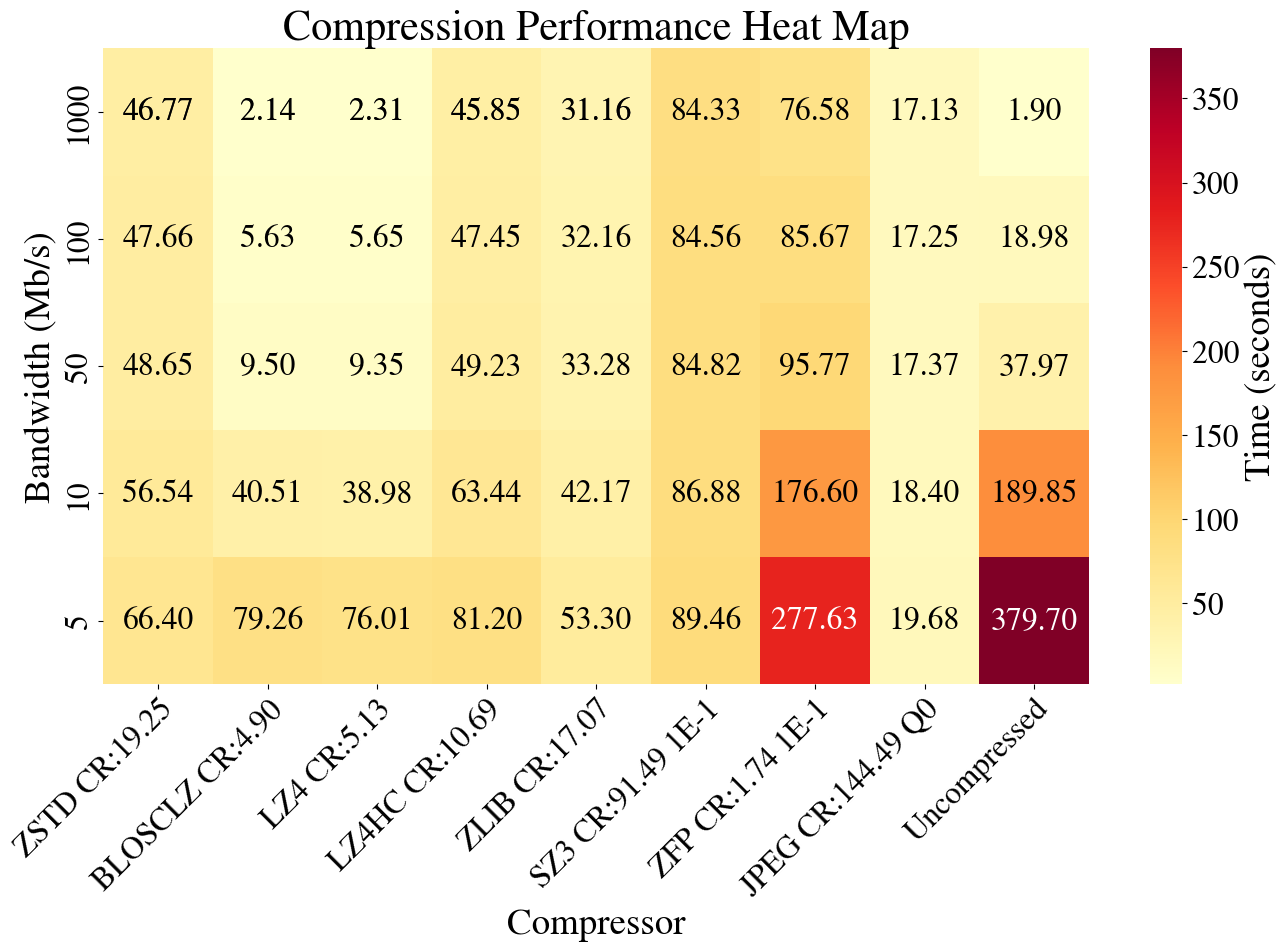

In [33]:
for idx_i, comp in enumerate(all_compressors):
    #compressed_ds_size = original_ds_size / compressors_dict[comp]["cr"] #og_ds_size / cr
    if comp != 'Uncompressed' and comp in lossless_compressors:
        #divide by 1000000 to convert it from bytes to megabytes (mb is 1e6 bytes)
        compressed_ds_size = compressors_dict[comp]["compressed_size_bytes"] / 1000000
    elif comp in lossy_compressors and comp != "JPEG":
        print(comp)
        print(compressors_dict[comp][lossy_compressor_bound])
        compressed_ds_size = compressors_dict[comp][lossy_compressor_bound]["compressed_size_bytes"] / 1000000
    elif comp == "JPEG":
        compressed_ds_size = compressors_dict[comp][jpeg_quality_level]["compressed_size_bytes"] / 1000000
        
    for idx_j, bw in enumerate(bandwidths):
        if comp != 'Uncompressed' and comp in lossless_compressors:
            #for compressors
            #print(comp)
            #print(compressors_dict[comp])
            data[idx_j][idx_i] = (compressed_ds_size / bw) + compressors_dict[comp]["total_time"]
        elif comp in lossy_compressors and comp != "JPEG":
            data[idx_j][idx_i] = (compressed_ds_size / bw) + compressors_dict[comp][lossy_compressor_bound]["total_time"]
        elif comp == "JPEG":
            data[idx_j][idx_i] = (compressed_ds_size / bw) + compressors_dict[comp][jpeg_quality_level]["total_time"]
        else:
            #for without a compressor
            data[idx_j][idx_i] = (uncompressed_size / bw)

# Set the global font to Times New Roman
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Nimbus Roman']

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Increase the font sizes
SMALL_SIZE = 12*1.9
MEDIUM_SIZE = 14*1.9
BIGGER_SIZE = 16*1.9

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Create the heat map
fig, ax = plt.subplots(figsize=(14, 10))  # Increased figure size
sns.heatmap(data, xticklabels=compressor_labels, yticklabels=bandwidths,
            cmap='YlOrRd', fmt='.2f', annot=True, ax=ax, cbar=True, 
            cbar_kws={'label': 'Time (seconds)'}, annot_kws={"size": SMALL_SIZE})

# Function to determine text color based on background
def text_color_for_background(value):
    threshold = (data.max() - data.min()) / 2.0 + data.min()
    return 'white' if value > threshold else 'black'

from matplotlib.patches import Rectangle

# Manually add text with conditional coloring
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        value = data[i, j]
        text_color = text_color_for_background(value)
        '''
        # Determine border color based on compressor type
        if all_compressors[j] in lossless_compressors:
            border_color = lossless_color
        elif all_compressors[j] in lossy_compressors:
            border_color = lossy_color
        elif all_compressors[j] == 'JPEG':
            border_color = jpeg_color
        else:  # Uncompressed
            border_color = uncompressed_color
        
        # Add colored border to cell
        ax.add_patch(Rectangle((j, i), 1, 1, fill=False, edgecolor=border_color, lw=2))
        '''
        
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}',
                ha="center", va="center", color=text_color, fontsize=SMALL_SIZE)

plt.xlabel('Compressor', fontsize=MEDIUM_SIZE)
plt.ylabel('Bandwidth (Mb/s)', fontsize=MEDIUM_SIZE)
plt.title('Compression Performance Heat Map', fontsize=BIGGER_SIZE)

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

'''
lossless_color = 'blue'
lossy_color = 'green'
jpeg_color = 'purple'
uncompressed_color = 'red'

legend_elements = [
    plt.Line2D([0], [0], color=lossless_color, lw=4, label='Lossless'),
    plt.Line2D([0], [0], color=lossy_color, lw=4, label='Lossy'),
    plt.Line2D([0], [0], color=jpeg_color, lw=4, label='JPEG'),
    plt.Line2D([0], [0], color=uncompressed_color, lw=4, label='Uncompressed')
]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
'''

# Adjust layout
plt.tight_layout()

# Save the figure as PNG
plt.savefig('lossless+lossy_heatmap_final.jpg', dpi=500, bbox_inches='tight')

# If you still want to display the plot, keep this line
plt.show()

In [34]:
# Plotting
plt.figure(figsize=(12, 8))

for comp in lossy_compressors:
    plt.plot(compressors_dict[comp], ssim_data[comp], marker='o', label=comp)

plt.plot(jpeg_cr, jpeg_ssim, marker='s', label='JPEG')

plt.xscale('log')
plt.xlabel('Compression Ratio (log scale)')
plt.ylabel('SSIM')
plt.title('SSIM vs Compression Ratio for Lossy Compressors')
plt.legend()
plt.grid(True)

# Add annotations for error bounds and JPEG quality levels
for comp in lossy_compressors:
    for i, bound in enumerate(error_bounds):
        if not np.isnan(ssim_data[comp][i]):
            plt.annotate(bound, (cr_data[comp][i], ssim_data[comp][i]), textcoords="offset points", xytext=(0,10), ha='center')

for i, quality in enumerate(jpeg_quality_levels):
    if not np.isnan(jpeg_ssim[i]):
        plt.annotate(str(quality), (jpeg_cr[i], jpeg_ssim[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.savefig('ssim_vs_compression_ratio.png', dpi=300)
plt.show()

print("Graph saved as 'ssim_vs_compression_ratio.png'")

NameError: name 'ssim_data' is not defined

<Figure size 1200x800 with 0 Axes>

   Compressor  Compression Ratio      SSIM Level
0        JPEG           2.813512  0.989415   100
1        JPEG           7.674097  0.949191    90
2        JPEG          11.210133  0.912966    80
3        JPEG          14.247381  0.881316    70
4        JPEG          17.192726  0.853484    60
5        JPEG          19.959073  0.829433    50
6        JPEG          23.442198  0.802167    40
7        JPEG          28.764026  0.765041    30
8        JPEG          39.280345  0.703449    20
9        JPEG          68.257817  0.577179    10
10       JPEG         147.898012  0.319129     0


/home/aniemcz/.conda/envs/universal/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniemcz/.conda/envs/universal/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


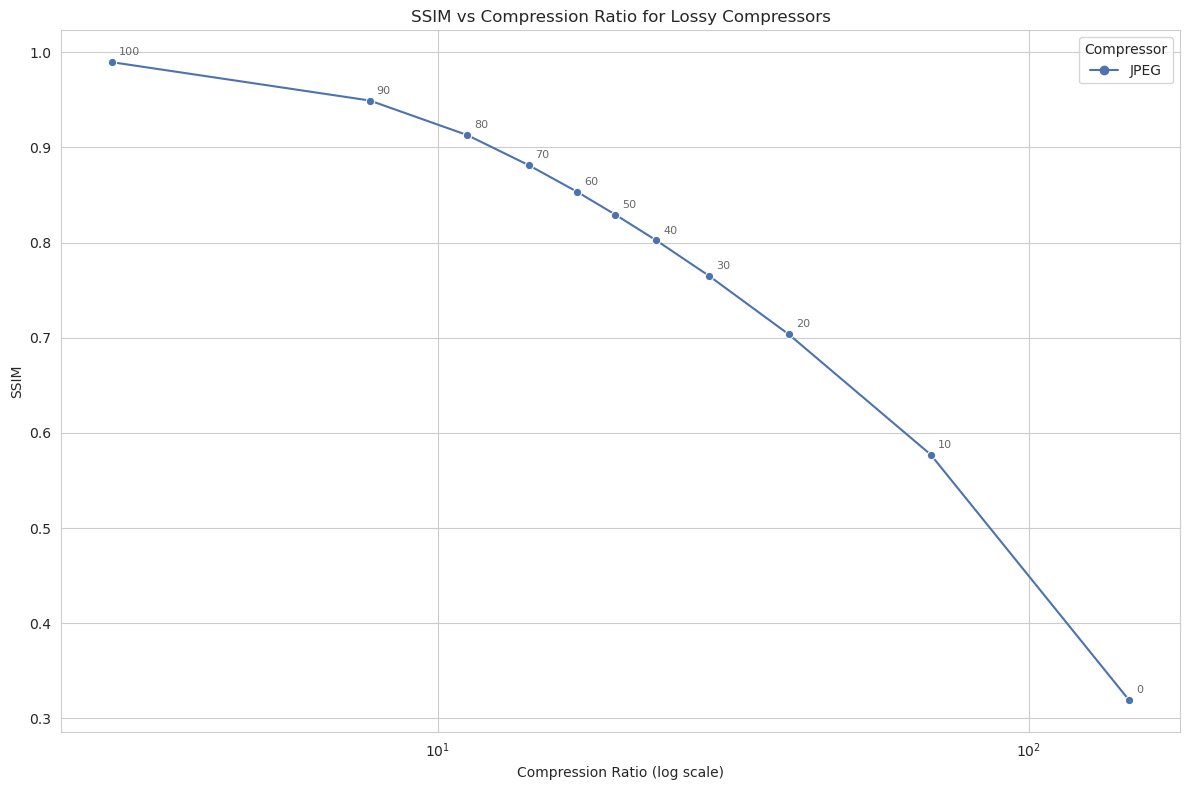

Graph saved as 'ssim_vs_compression_ratio_seaborn.png'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load lossy compression data
lossy_df = pd.read_csv('output/cavs_mini_lossy_v2_Train_v3.csv')
jpeg_df = pd.read_csv('output/compression_metrics.csv')

# Process lossy data
lossy_compressors = ['SZ3', 'ZFP']
error_bounds = ['1E-7', '1E-6', '1E-5', '1E-4', '1E-3', '1E-2', '1E-1']

data = []

for comp in lossy_compressors:
    comp_df = lossy_df[lossy_df['compressor'] == comp.lower()]
    for bound in error_bounds:
        bound_df = comp_df[comp_df['bound'].apply(lambda x: np.isclose(float(x), float(bound[2:])))]
        if not bound_df.empty:
            cr = bound_df['uncompressed_size_bytes'].mean() / bound_df['compressed_size_float32_bytes'].mean()
            ssim = bound_df['ssim'].mean()
            data.append({'Compressor': comp, 'Compression Ratio': cr, 'SSIM': ssim, 'Level': bound})

# Process JPEG data
jpeg_quality_levels = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
jpeg_train_df = jpeg_df[jpeg_df['split'] == 'Train']

for quality in jpeg_quality_levels:
    quality_df = jpeg_train_df[jpeg_train_df['quality'] == quality]
    if not quality_df.empty:
        cr = quality_df['uncompressed_size_bytes'].mean() / quality_df['compressed_size_bytes'].mean()
        ssim = quality_df['ssim'].mean()
        data.append({'Compressor': 'JPEG', 'Compression Ratio': cr, 'SSIM': ssim, 'Level': str(quality)})

# Create DataFrame
df = pd.DataFrame(data)

print(df)

# Set up the plot style
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Compression Ratio', y='SSIM', hue='Compressor', style='Compressor', markers=True, dashes=False)

# Customize the plot
plt.xscale('log')
plt.xlabel('Compression Ratio (log scale)')
plt.ylabel('SSIM')
plt.title('SSIM vs Compression Ratio for Lossy Compressors')

# Add annotations for levels
for _, row in df.iterrows():
    plt.annotate(row['Level'], (row['Compression Ratio'], row['SSIM']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)

plt.tight_layout()
plt.savefig('ssim_vs_compression_ratio_seaborn.png', dpi=300)
plt.show()

print("Graph saved as 'ssim_vs_compression_ratio_seaborn.png'")

# SSIM Vs. CR Graph

/home/aniemcz/.conda/envs/universal/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniemcz/.conda/envs/universal/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


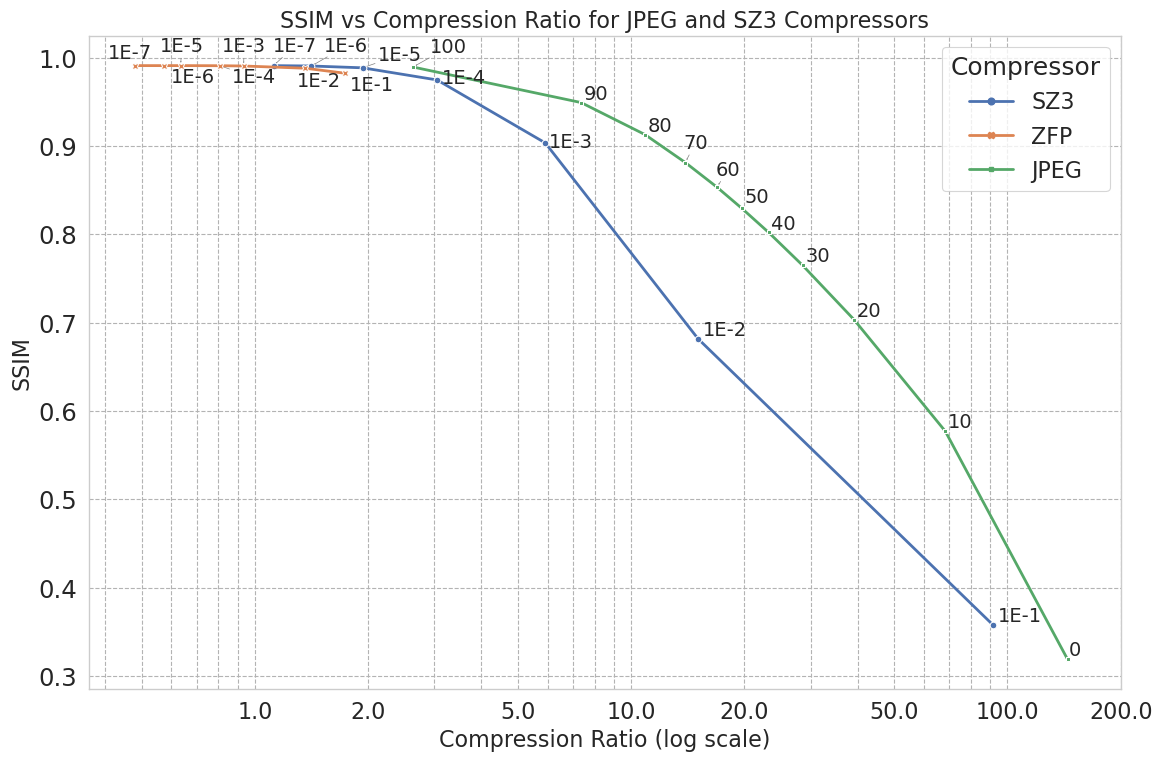

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text

# Data
#not the actual data, this is just how the data is formatted to help give a visual
data = {
    'SZ3': {
        '1E-7': {'cr': 1.1213294467667876, 'ssim': 0.9909692542761631},
        '1E-2': {'cr': 15.06267695669014, 'ssim': 0.6818784683654395},
        '1E-1': {'cr': 91.4919791238279, 'ssim': 0.35811586587328964}
    },
    'JPEG': {
        '100': {'cr': 2.6324812129281607, 'ssim': 0.9894147867565968},
        '90': {'cr': 7.362721799436818, 'ssim': 0.9491907271211265},
        '10': {'cr': 68.39305019212148, 'ssim': 0.5771790514322716},
        '0': {'cr': 144.48744289528008, 'ssim': 0.3191289324362884}
    }
}

lossy_compressors = ['SZ3', 'ZFP', 'JPEG']
lossy_compressors_dict = {comp: compressors_dict[comp] for comp in lossy_compressors if comp in compressors_dict}
data = lossy_compressors_dict

# Prepare data for plotting
plot_data = []
for compressor, values in lossy_compressors_dict.items():
    for setting, metrics in values.items():
        plot_data.append({
            'Compressor': compressor,
            'Setting': setting,
            'Compression Ratio': metrics['cr'],
            'SSIM': metrics['ssim']
        })

df = pd.DataFrame(plot_data)

# Set up the plot style
sns.set_style("whitegrid")
sns.set_palette("deep")
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 2})

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Compression Ratio', y='SSIM', hue='Compressor', style='Compressor', markers=True, dashes=False)

# Customize the plot
plt.xscale('log')
plt.title('SSIM vs Compression Ratio for JPEG and SZ3 Compressors', fontsize=16)
plt.xlabel('Compression Ratio (log scale)', fontsize=16)
plt.ylabel('SSIM', fontsize=16)

x_ticks = [1, 2, 5, 10, 20, 50, 100, 200]  # Custom tick positions
plt.xticks(x_ticks, [f'{xtick:.1f}' for xtick in x_ticks], fontsize=16)  # Format tick labels

# Collect text annotations
texts = []
for _, row in df.iterrows():
    texts.append(plt.text(row['Compression Ratio'], row['SSIM'], row['Setting'], fontsize=14))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

plt.legend(title='Compressor', title_fontsize=18, fontsize=16)
plt.grid(True, which="both", ls="--", c='0.7')

# Show the plot
plt.tight_layout()
plt.savefig('output/ssim_vs_compression_ratio_seaborn.svg')
plt.show()
